In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [161]:
df = pd.read_csv("delivery_time.csv")

In [162]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [163]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [164]:
x = df['Sorting Time']
df["x2"] = df['Sorting Time'] ^2
df["logx"] = df['Sorting Time']
df["sqrt(x)"] = df['Sorting Time']
df

,Delivery Time,Sorting Time,x2,logx,sqrt(x)
0,21.00,10,8,10,10
1,13.50,4,6,4,4
2,19.75,6,4,6,6
3,24.00,9,11,9,9
4,29.00,10,8,10,10
5,15.35,6,4,6,6
6,19.00,7,5,7,7
7,9.50,3,1,3,3
8,17.90,10,8,10,10
9,18.75,9,11,9,9


In [165]:
y = df['Delivery Time']
x = np.c_[x]

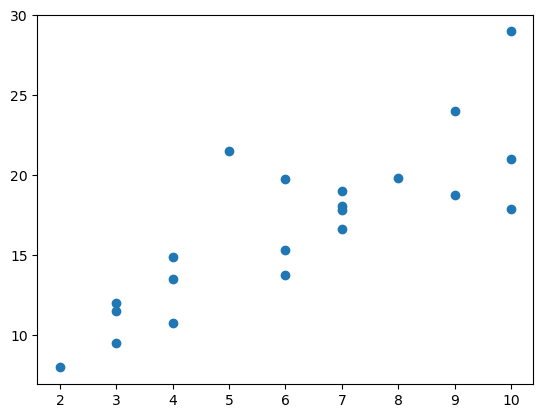

In [166]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [167]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [168]:
LR.intercept_ #c

6.58273397199706

In [169]:
LR.coef_  #m

array([1.6490199])

In [170]:
y_pred = LR.predict(x)
y_pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [171]:
error = y - y_pred
error

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
Name: Delivery Time, dtype: float64

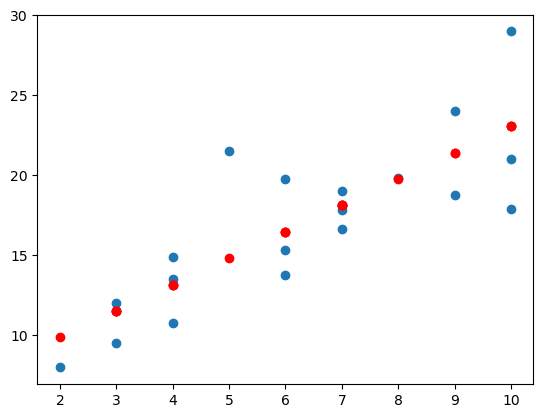

In [172]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.scatter(x,y_pred,color='red')
plt.show()

In [173]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("Mean squarred error:",mse.round(3))
print("Root Mean squarred error:",np.sqrt(mse).round(3))

Mean squarred error: 7.793
Root Mean squarred error: 2.792


In [174]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("R square:",r2.round(2))

R square: 0.68


In [175]:
#extract the true and predicted values
y_true = df['Sorting Time'].values
y_pred = df['Delivery Time'].values

In [176]:
# apply log transformation
y_true_log = np.log(y_true)
y_pred_log = np.log(y_pred)

In [177]:
#apply square transformation
y_true_square = np.square(y_true)
y_pred_square = np.square(y_pred)

In [178]:
# apply square root transformation
y_true_sqrt = np.sqrt(y_true) 
y_pred_sqrt = np.sqrt(y_pred)

In [179]:
# calculate RMSE for each transformation
rmse_log = np.sqrt(mean_squared_error(y_true_log, y_pred_log))
rmse_square = np.sqrt(mean_squared_error(y_true_square,y_pred_square))
rmse_sqrt = np.sqrt(mean_squared_error(y_true_sqrt, y_pred_sqrt))

In [180]:
print("RMSE:",rmse_log)

RMSE: 1.0726313656288116


In [181]:
print("RMSE:",rmse_square)

RMSE: 304.25332850157315


In [182]:
print("RMSE:",rmse_sqrt)

RMSE: 1.649792703488695
